# Aufgabe 1: Rundungsfehler bei Summation am Rechner

**Wichtiger Hinweis**: Vor der Bearbeitung der ersten Aufgabe lohnt es sich das Skript `python_einfuehrung.ipynb` zumindest zu überfliegen, auch wenn Sie bereits mit Python vertraut sind.

In dieser Aufgabe wollen wir Rundungsfehler genauer untersuchen, weshalb wir mit ungenaueren float32-Zahlen rechnen werden und nicht mit double-Variablen.

Programmieren Sie eine Routine $s = \operatorname{summe}(n,p)$, welche für vorgegebenes $n$ die n-te Partialsumme $s$ der alternierenden harmonischen Reihe berechnet. Die alternierende harmonische Reihe konvergiert bekanntermaßen, d.h. für
$$
s_n := \sum\limits_{k=1}^n(-1)^{k+1}\frac1k
\qquad \text{ gilt } \qquad
\lim _{n\rightarrow \infty} s_n
 = \ln (2).
$$

Der Parameter $p \in \{ 1,2,3,4 \}$ soll dabei die Summationsart angeben:

* $p = 1$: Normales Aufsummieren $s_n=\frac11-\frac12+\frac13-\ldots \pm \frac1n$

* $p = 2$: Aufsummieren in umgekehrter Reihenfolge $s_n=\pm\frac1n\mp\frac1{n-1}\pm\ldots +\frac13-\frac12+\frac11$

* $p = 3$: Aufsummieren der Anteile von $s_n$, getrennt nach geraden und ungeraden Indizes in normaler Reihenfolge
  $$
  s_n=s_u-s_g,\quad s_u=\frac11+\frac13+\frac15+\ldots,\quad
  s_g=\frac12+\frac14+\frac16+\ldots,
  $$

* $p = 4$: Aufsummieren der Anteile von $s_n$, getrennt nach geraden und ungeraden Indizes in umgekehrter Reihenfolge
  $$
  s_n=s_u-s_g,\quad s_u=\frac1n+\frac1{n-2}+\ldots+\frac13+\frac11,\quad
  s_g=\frac1{n-1}+\frac1{n-3}+\ldots+\frac14+\frac12
  $$


> ### Programmtechnische Hinweise:
> * Achten Sie auf die verwendeten Datentypen: $1.0$ entspricht *double*. Generell dominiert in Python double, d.h. float32 + double + int = double.
> * Es ist ausreichend pro Summationsschritt nur einen einzelnen Aufruf von `np.float32()` zu verwenden. Überlegen Sie sich, an welcher Stelle dieser sinnvoll ist.
> * Es wird dringed dazu geraten, jedes Ihrer Programme ausreichend zu kommentieren. Dies dient der Dokumentation und dem Verständnis des Programmcodes. Die Wichtigkeit hochwertiger Kommentare kann nicht überschätzt werden.

In [1]:
import numpy as np
from math import log
import matplotlib.pyplot as plt
import time
import sys

Fügen Sie hier Ihre Funktion summe ein. Einige Zeilen sind schon gegeben.

In [2]:
def summe(n, par):
    """
    Partialsummenberechnung mit i=1..n nach verschiedenen Verfahren:
      par=1: wachsendes i mit wechselndem Vorzeichen
      par=2: schwindendes i mit wechselndem Vorzeichen
      par=3: wachsendes i, gerade/ungerade separiert
      par=4: schwindendes i, gerade/ungerade separiert
    """
    if par == 1:  # vorwaerts
        s = np.float32(0.0)
        for i in range(1, n + 1):
            # s = s + np.float32(((-1.0)**(i + 1)) ) / i  # ergibt double-Rechnung!!
            s = s + np.float32(((-1)**(i + 1)) / i)
    elif par == 2:  # rueckwaerts
        s = np.float32(0.0)
        for i in range(n, 0, -1):
            s = s + np.float32(((-1)**(i + 1)) / i)
    elif par == 3:  # g/u vorwaerts
        s = np.float32(0.0)
        su = np.float32(0.0)
        sg = np.float32(0.0)
        for i in range(1, n + 1, 2):
            su = su + np.float32(1.0 / i)
        for i in range(2, n + 1, 2):
            sg = sg + np.float32(1.0 / i)
        s = su - sg
    elif par == 4:  # g/u rueckwaerts
        s = np.float32(0.0)
        su = np.float32(0.0)
        sg = np.float32(0.0)
        ng = n % 2
        nu = 1 - ng
        for i in range(n - nu, 0, -2):
            su = su + np.float32(1.0 / i)
        for i in range(n - ng, 0, -2):
            sg = sg + np.float32(1.0 / i)
        s = su - sg
    else:
        print("second argument of summe must be in 1:4")

    return s

## Testskript 
Das Testskript wertet für $n = 5, 10^1,10^2,\ldots,10^6,10^7$ Ihre Routine aus und berechnet den Normfehler Ihres Ergebnisses zu `np.float32(log(2.0))`. Anschließend wird der Fehler in einem Plot ausgeben, der wie folgt aussehen sollte:

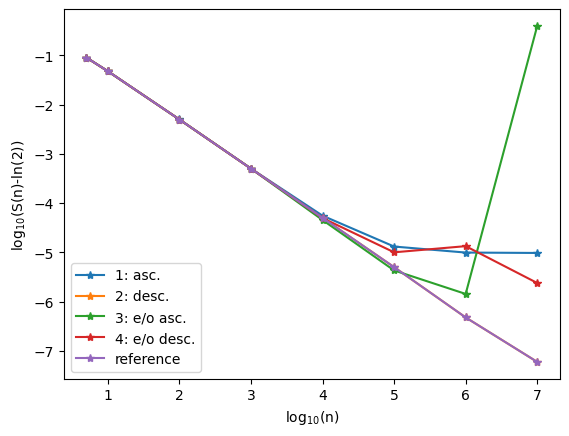

Die Ausführung kann etwas (30s~1min) dauern, weshalb es Sinn macht erstmal kleinere `N` zu verwenden.

In [3]:
N = np.array([5, 10, 100, 1000, 10000, 100000, 1000000, 10000000], dtype=int)
# N = np.array([5, 10, 100, 1000, 10000, 100000], dtype=int)


Partialsummen
[[0.78333336 0.78333336 0.7833334  0.7833333 ]
 [0.6456349  0.64563495 0.645635   0.645635  ]
 [0.6881719  0.6881722  0.6881726  0.68817234]
 [0.69264585 0.69264746 0.69264627 0.69264746]
 [0.6930917  0.6930972  0.6931019  0.6930976 ]
 [0.69313407 0.6931422  0.6931429  0.69313717]
 [0.6931373  0.6931467  0.69314575 0.69313383]
 [0.69313747 0.6931471  0.29815865 0.6931448 ]]

Partialsummen - ln(2)
[[9.0186179e-02 9.0186179e-02 9.0186238e-02 9.0186119e-02 9.0186179e-02]
 [4.7512293e-02 4.7512233e-02 4.7512174e-02 4.7512174e-02 4.7512233e-02]
 [4.9752593e-03 4.9749613e-03 4.9746037e-03 4.9748421e-03 4.9750209e-03]
 [5.0133467e-04 4.9972534e-04 5.0091743e-04 4.9972534e-04 4.9972534e-04]
 [5.5491924e-05 5.0008297e-05 4.5299530e-05 4.9591064e-05 5.0008297e-05]
 [1.3113022e-05 5.0067902e-06 4.2915344e-06 1.0013580e-05 5.0067902e-06]
 [9.8943710e-06 4.7683716e-07 1.4305115e-06 1.3351440e-05 4.7683716e-07]
 [9.7155571e-06 5.9604645e-08 3.9498854e-01 2.3841858e-06 5.9604645e-08]]


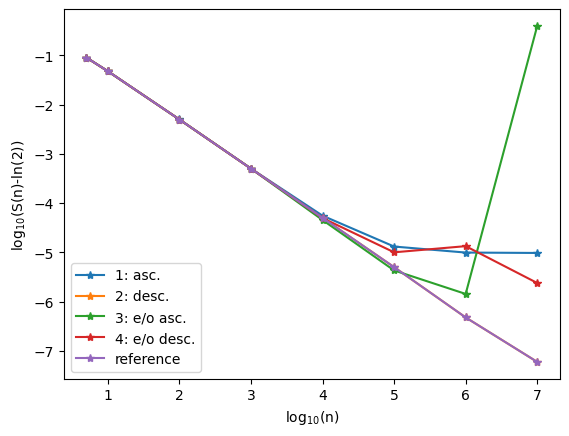

In [4]:
xn = N.size
s = np.zeros((xn, 5), dtype=np.float32)
e = np.zeros((xn, 4), dtype=np.float32)
e2 = np.zeros((xn, 4), dtype=np.float32)
ct = np.zeros((xn, 5))

# Vergleichswert: doppeltgenaue Summenberechnung
for x in range(xn):
    n = N[x]
    sti = time.perf_counter()
    su = 0.0
    salt = 0.0
    d = 0.0
    for i in range(1, n, 2):
        salt = su
        su = su + 1.0 / (i * (i + 1))
        d = d + 1.0 / (i * (i + 1)) - (su - salt)
    if (n % 2) == 1:
        d = d + 1.0 / n
    s[x, 4] = np.float32(su + d)  # auf single precision kuerzen!
    ct[x, 4] = time.perf_counter() - sti

for par in range(4):
    for x in range(xn):
        n = N[x]
        sti = time.perf_counter()
        s[x, par] = summe(n, par + 1)
        ct[x, par] = time.perf_counter() - sti
e = np.abs(s - np.float32(log(2.0)))
e2 = np.abs(s[:, :-1] - np.outer(s[:, -1], np.ones(4)))

print("\nPartialsummen")
print(s[:, :-1])
print("\nPartialsummen - ln(2)")
print(e)
print("\nPartialsummen - (best of algorithms)")
print(e2)
print('\nRechenzeiten["]')
print(ct)
print('\nRechenzeiten pro Verfahren["]')
print(np.sum(ct, axis=0))
print('\nGesamt-Rechenzeit["]')
print(np.sum(ct))

sys.stdout.flush()
plt.figure("Partialsummenvergleich")
plt.plot(np.log10(N), np.log10(e), "*-")
# plt.loglog ( N,e,'*-' )
# plt.plot ( N,1.0/e,'*-' )
plt.legend(
    [
        "1: asc.",
        "2: desc.",
        "3: e/o asc.",
        "4: e/o desc.",
        "reference",
    ],
    loc=3,
)
plt.xlabel("log$_{10}$(n)")
plt.ylabel(
    "log$_{10}$(S(n)-ln(2))"
)
plt.show()